<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99102456
            <br />
            Name = Ilia
            <br />
            Last_Name = Hashmei Rad
        </div>
        <div class="column">
        <br />
            student_number = 400109479
            <br />
            Name = MohammadPouya   
            <br />
            Last_Name = Toroghi
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [8]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import tensorflow as tf

# Load Dataset and Prepare It

In [39]:
# Define the transform to normalize the data and convert it to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download the training set
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download the test set
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [40]:
# Define a custom transform to add Gaussian noise
class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

# Apply the noise transform to the trainset and testset
trainset_noisy = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(0.0, 0.1)
]))

testset_noisy = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(0.0, 0.1)
]))

# Define the batch size for training and testing
batch_size = 64

# Create dataloaders for the original and noisy datasets
trainloader = data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
trainloader_noisy = data.DataLoader(trainset_noisy, batch_size=batch_size, shuffle=True)

testloader = data.DataLoader(testset, batch_size=batch_size, shuffle=False)
testloader_noisy = data.DataLoader(testset_noisy, batch_size=batch_size, shuffle=False)


# Define Your Model
torch neural network model

In [47]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 64),
            nn.ReLU(True),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In this implementation, the encoder consists of two fully connected layers with ReLU activation functions, which reduce the input data from the original 28$\times$28 size to a 64-dimensional representation. The decoder then consists of two fully connected layers with ReLU and sigmoid activation functions, which expand the 64-dimensional representation back to the original 28$\times$28 size.

The forward method of the AutoEncoder class takes the input x and passes it through the encoder and decoder to obtain the reconstructed output.

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [48]:
# Instantiate the AutoEncoder model
model = AutoEncoder()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the criterion (loss function)
criterion = nn.MSELoss()

# Define the number of epochs for training
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    # Training phase
    for images, _ in trainloader_noisy:
        # Flatten the images
        images = images.view(-1, 28 * 28)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, images)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute the average training loss for the epoch
    train_loss = running_loss / len(trainloader_noisy)

    # Evaluation phase
    with torch.no_grad():
        model.eval()
        running_loss = 0.0

        for images, _ in testloader_noisy:
            # Flatten the images
            images = images.view(-1, 28 * 28)

            # Forward pass
            outputs = model(images)

            # Calculate the loss
            loss = criterion(outputs, images)

            running_loss += loss.item()

        # Compute the average test loss for the epoch
        test_loss = running_loss / len(testloader_noisy)

    # Print the training and test loss for each epoch
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")

    # Set the model back to training mode
    model.train()

Epoch 1/10 - Train Loss: 0.0416 - Test Loss: 0.0248
Epoch 2/10 - Train Loss: 0.0222 - Test Loss: 0.0198
Epoch 3/10 - Train Loss: 0.0192 - Test Loss: 0.0182
Epoch 4/10 - Train Loss: 0.0178 - Test Loss: 0.0170
Epoch 5/10 - Train Loss: 0.0168 - Test Loss: 0.0164
Epoch 6/10 - Train Loss: 0.0162 - Test Loss: 0.0159
Epoch 7/10 - Train Loss: 0.0158 - Test Loss: 0.0156
Epoch 8/10 - Train Loss: 0.0155 - Test Loss: 0.0153
Epoch 9/10 - Train Loss: 0.0153 - Test Loss: 0.0151
Epoch 10/10 - Train Loss: 0.0151 - Test Loss: 0.0150


In this model, the reconstruction loss is minimized using the mean squared error (MSE) loss between the original input data and the reconstructed output data. The MSE loss measures the average squared difference between the original and reconstructed data and is a common choice for our autoencoder model.

During training, the model takes an input data point, passes it through the encoder to obtain a compressed representation, and then passes the compressed representation through the decoder to obtain the reconstructed output. The MSE loss between the original input data and the reconstructed output data is then computed and used to update the model's parameters through backpropagation.

The optimization algorithm used to update the model's parameters is typically stochastic gradient descent (SGD) or one of its variants such as Adam. The goal of the optimization algorithm is to find the set of parameters that minimize the reconstruction loss over the training set.

# Plot The Results

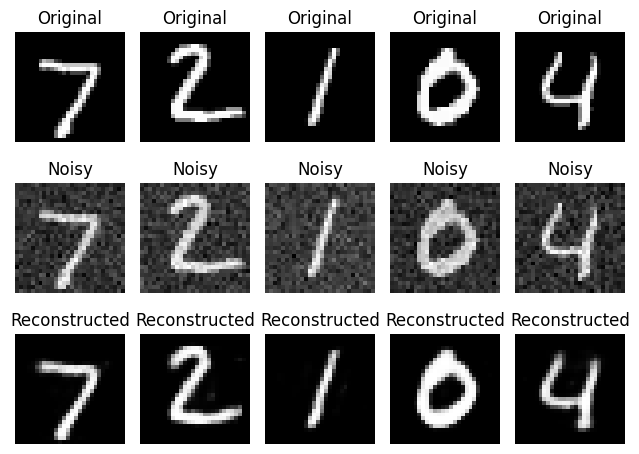

In [49]:
# Set the model to evaluation mode
model.eval()

# Get a batch of test images and their noisy versions
images, _ = next(iter(testloader))
noisy_images, _ = next(iter(testloader_noisy))

# Flatten the images
images = images.view(-1, 28 * 28)
noisy_images = noisy_images.view(-1, 28 * 28)

# Pass the noisy images through the AutoEncoder
with torch.no_grad():
    reconstructed_images = model(noisy_images)

# Reshape the images back to their original shape
images = images.view(-1, 28, 28)
noisy_images = noisy_images.view(-1, 28, 28)
reconstructed_images = reconstructed_images.view(-1, 28, 28)

# Plot the original images, noisy images, and reconstructed images
num_samples = 5

for i in range(num_samples):
    plt.subplot(3, num_samples, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(3, num_samples, num_samples + i + 1)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    plt.subplot(3, num_samples, 2 * num_samples + i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


# PCA

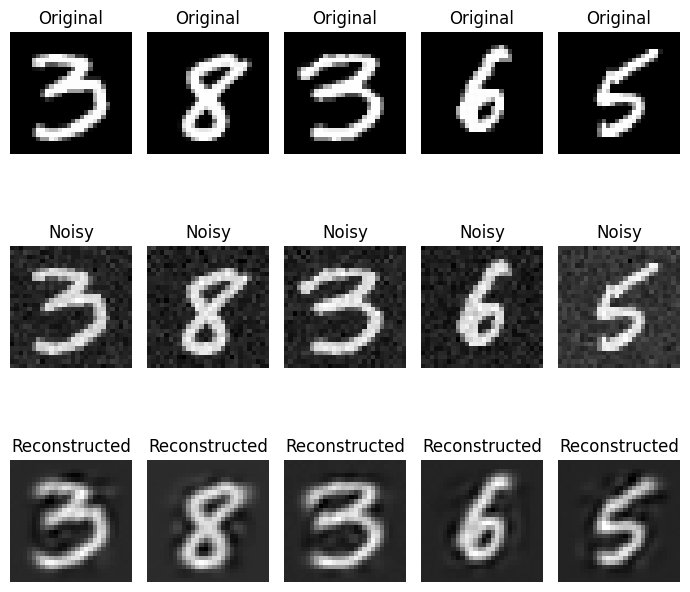

In [19]:
# Step 1: Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, _), (X_test, _) = mnist.load_data()

# Step 2: Flatten the image data
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Step 3: Add Gaussian noise to the datasets
noise_stddev = 15

X_train_noisy = X_train + np.random.normal(scale=noise_stddev, size=X_train.shape)
X_test_noisy = X_test + np.random.normal(scale=noise_stddev, size=X_test.shape)

# Step 4: Denoise the datasets using PCA
n_components = 0.85

# Fit PCA on the training set
pca = PCA(n_components=n_components)
pca.fit(X_train_noisy)

# Denoise the training, validation, and testing sets
X_train_denoised = pca.inverse_transform(pca.transform(X_train_noisy))
X_test_denoised = pca.inverse_transform(pca.transform(X_test_noisy))

# Choose random images for plotting
num_images = 5

random_indices = np.random.choice(range(len(X_train)), num_images)

# Plot the original images
plt.figure(figsize=(7, 7))
for i, idx in enumerate(random_indices):
    plt.subplot(3, num_images, i + 1)
    plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

# Plot the noisy images
for i, idx in enumerate(random_indices):
    plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(X_train_noisy[idx].reshape(28, 28), cmap='gray')
    plt.title('Noisy')
    plt.axis('off')

# Plot the reconstructed images
for i, idx in enumerate(random_indices):
    plt.subplot(3, num_images, 2 * num_images + i + 1)
    plt.imshow(X_train_denoised[idx].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()


As you can see, denoising with AutoEncoders Usually performs better than PCA because autoencoders are capable of learning more complex and non-linear relationships between the input data and the denoised output, whereas PCA can only capture linear combinations of the input features.

PCA is a dimensionality reduction technique that finds the principal components of the input data by projecting it onto a low-dimensional subspace that captures the most variance in the data.

Autoencoders, on the other hand, are neural networks that can learn non-linear representations of the input data through a series of non-linear transformations. In the case of denoising, the autoencoder learns to map the noisy input data to the corresponding clean output data by passing it through a series of non-linear transformations in the encoder and decoder. This allows the autoencoder to capture more complex and non-linear relationships between the input data and the denoised output, which may be more effective at removing certain types of noise.